Importing all the required packages

In [1]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
from PIL import Image

data_dir = r"D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data"

In [2]:
transformer = transforms.Compose(
    [
        transforms.Resize((144, 144)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.2, 0.2, 0.2]),
    ]
)


In [3]:
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transformer)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transformer)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


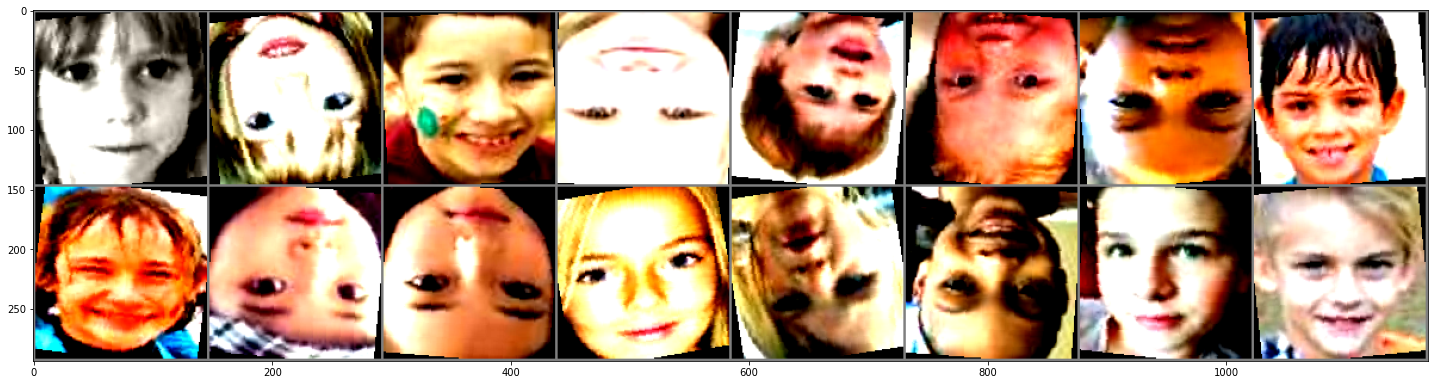

autistic non_autistic autistic non_autistic autistic non_autistic autistic autistic autistic non_autistic non_autistic non_autistic autistic non_autistic non_autistic non_autistic


In [4]:

batch_size = 16
classes = ('autistic', 'non_autistic')
#Showing {batch_size} random images from a single random batch in a grid format
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig, ax = plt.subplots(figsize=(25, 25))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [7]:
X_train, y_train = [], []
for images, labels in train_loader:
    images = images.numpy().reshape(-1, 144 * 144 * 3)
    X_train.append(images)
    y_train.append(labels)

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

X_test, y_test = [], []
for images, labels in test_loader:
    images = images.numpy().reshape(-1, 144 * 144 * 3)
    X_test.append(images)
    y_test.append(labels)

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

### Default SVM 

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

svc= svm.SVC(probability=True)
svc.fit(X_train, y_train)

train_acc = svc.score(X_train, y_train)
val_acc = svc.score(X_val, y_val)
test_acc = svc.score(X_test, y_test)

print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print("Test Accuracy: ", test_acc)

Train Accuracy:  0.8779544477868501
Validation Accuracy:  0.6909975669099757
Test Accuracy:  0.8217821782178217


### Hyperparameter tuning

In [ ]:
import multiprocessing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
param_grid = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly','linear']}

svc = svm.SVC(probability=True)
print("The training of the model is started, this process may take a while to complete")

# Use parallel processing to speed up the training process
num_cores = multiprocessing.cpu_count()

# Set n_jobs to half the number of CPUs
n_jobs = int(num_cores - 9)

model = GridSearchCV(svc, param_grid, cv=5, n_jobs = n_jobs)

# Fit the model to the training data
model.fit(X_train,y_train)
print('The Model is trained well with the given images.')

# Print the best hyperparameters and the best accuracy
print("Best hyperparameters: ", model.best_params_)
print("Best accuracy: ", model.best_score_)

The training of the model is started, this process may take a while to complete


In [6]:
# Use parallel processing to speed up the training process
import multiprocessing
num_cores = multiprocessing.cpu_count()

# Set n_jobs to half the number of CPUs
n_jobs = int(num_cores / 2)
print(num_cores)

12


Predicting our testing data

In [6]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [7]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [14]:
# Calculate accuracy on new test dataset
y_pred = model.predict(X_test)
print(f"The accuracy of the model on new test dataset is {accuracy_score(y_pred,y_test)*100}%.")

The accuracy of the model on new test dataset is 85.64356435643565%.


Using Pickle to save the model to disk

In [10]:
pickle.dump(model,open('svm_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Testing of model :

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\non_autistic\1378.jpg


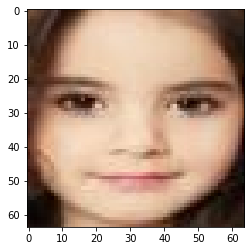

autistic = 10.742854083390917%
non_autistic = 89.25714591660908%
The predicted image is : non_autistic
The actual image is : non_autistic
Continue? (y/n)y

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\non_autistic\1420.jpg


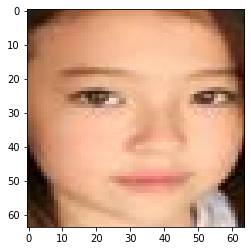

autistic = 4.910634650879322%
non_autistic = 95.08936534912065%
The predicted image is : non_autistic
The actual image is : non_autistic
Continue? (y/n)y

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\autistic\1455.jpg


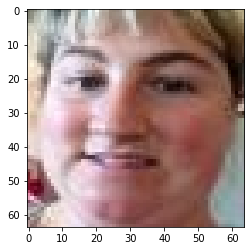

autistic = 80.10332631811272%
non_autistic = 19.89667368188727%
The predicted image is : autistic
The actual image is : autistic
Continue? (y/n)y

Enter URL of Image: D:\VinUni materials\Third Year\Fall Semester 2022\COMP3020 - Machine Learning\Project\GUI application\Official_Data\test\autistic\1410.jpg


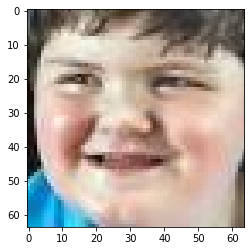

autistic = 50.0%
non_autistic = 50.0%
The predicted image is : non_autistic
The actual image is : autistic
Continue? (y/n)n
Thank you for testing the model!


In [11]:
#print(os.path.abspath(os.getcwd()))
model = pickle.load(open('svm_model.p','rb'))
classes = ['autistic', 'non_autistic']

actual_image = ''
while True:
    url=input('Enter URL of Image: ')
    if 'non_autistic' in url:
        actual_image = 'non_autistic'
    else:
        actual_image = 'autistic'
        
    image = Image.open(url)
    imgplot = plt.imshow(image)
    plt.show()
    image = transformer(image)
    image = image.numpy().reshape(-1, 144 * 144 * 3)
    # image = image.float()
    # image = Variable(image, requires_grad=True)

    # l=[img_resize.flatten()]
    probability = model.predict_proba(image)
#     print("The predicted image is : "+ classes[prediction[0]])
#     print("The actual image is : " + actual_image)

    for ind,val in enumerate(classes):
      print(f'{val} = {probability[0][ind]*100}%')
    print("The predicted image is : "+ classes[model.predict(image)[0]])
    print("The actual image is : " + actual_image)
    continue_predict = input("Continue? (y/n)")
    if continue_predict.lower() == 'y':
        print()
    else: 
        print("Thank you for testing the model!")
        break
    
